In [277]:
from datetime import date
import datetime
from datetime import datetime  
from datetime import timedelta  
import dateutil.parser
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [280]:
data = pd.read_csv(r'C:\Users\JMSch\Desktop\COVID19\Netherlands_28032020.csv', sep = ',')
data = data[data.Confirmed != 0]

data['Date'] = data['Date'].apply(lambda x: x -2)
data['Date'] = data['Date'].astype('datetime64[D]') 
data['Date'] = data['Date'].dt.strftime('%d/%m/2020')

data.head(3)

,Time,Date,Confirmed
0,1,26/02/2020,1
1,2,27/02/2020,1
2,3,28/02/2020,6


In [281]:
data['logConfirmed'] = np.log(data.Confirmed)
data.head(10)

,Time,Date,Confirmed,logConfirmed
0,1,26/02/2020,1,0.000000
1,2,27/02/2020,1,0.000000
2,3,28/02/2020,6,1.791759
3,4,01/03/2020,10,2.302585
4,5,02/03/2020,18,2.890372
5,6,03/03/2020,24,3.178054
6,7,04/03/2020,38,3.637586
7,8,05/03/2020,82,4.406719
8,9,06/03/2020,128,4.852030
9,10,07/03/2020,188,5.236442


In [282]:
# sorting by first name 
data.sort_values("Confirmed", inplace = True) 

data

,Time,Date,Confirmed,logConfirmed
0,1,26/02/2020,1,0.000000
1,2,27/02/2020,1,0.000000
2,3,28/02/2020,6,1.791759
3,4,01/03/2020,10,2.302585
4,5,02/03/2020,18,2.890372
5,6,03/03/2020,24,3.178054
6,7,04/03/2020,38,3.637586
7,8,05/03/2020,82,4.406719
8,9,06/03/2020,128,4.852030
9,10,07/03/2020,188,5.236442


In [283]:
X = data.Time
X = sm.add_constant(X)

In [284]:
y = data.logConfirmed

In [285]:
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

OLS Regression Results                            
Dep. Variable:           logConfirmed   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     304.8
Date:                Sat, 28 Mar 2020   Prob (F-statistic):           1.38e-16
Time:                        19:08:44   Log-Likelihood:                -33.571
No. Observations:                  30   AIC:                             71.14
Df Residuals:                      28   BIC:                             73.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5265      0.287      5.315      0.000       0.938       2.115
T

In [289]:
def linear_predictions(t):
    return np.exp(1.5265) * np.exp(0.2824) ** t

In [287]:
Current_Horizon = int(max(data['Time']))
Prediction_Horizon = 14 ##Change "14" to adjust the forecasting horizon
FindDate = data['Date'].iloc[-1]
MaxDate = dateutil.parser.parse(FindDate).date()
print(MaxDate)


columns = ['Time', 'Date']
for i in range(Prediction_Horizon):
    New_Time = max(data['Time']) + 1
    Days_Delay = (New_Time - Current_Horizon)
    New_Date = MaxDate + timedelta(days=Days_Delay) 
    New_Date = New_Date.strftime("%d/%m/%Y")
    data = data.append({'Time': New_Time, 'Date': New_Date},ignore_index=True)


2020-03-27


In [ ]:
data

In [292]:
data['Predictions'] = data.Time.apply(linear_predictions)

data.head(10)

,Time,Date,Confirmed,logConfirmed,Predictions
0,1,26/02/2020,1.0,0.000000,6.103730
1,2,27/02/2020,1.0,0.000000,8.095432
2,3,28/02/2020,6.0,1.791759,10.737046
3,4,01/03/2020,10.0,2.302585,14.240642
4,5,02/03/2020,18.0,2.890372,18.887494
5,6,03/03/2020,24.0,3.178054,25.050656
6,7,04/03/2020,38.0,3.637586,33.224913
7,8,05/03/2020,82.0,4.406719,44.066506
8,9,06/03/2020,128.0,4.852030,58.445810
9,10,07/03/2020,188.0,5.236442,77.517212


In [293]:
data.to_csv(r'C:\Users\JMSch\Desktop\COVID19\COVID19_Netherlands.csv', index = False)

No handles with labels found to put in legend.


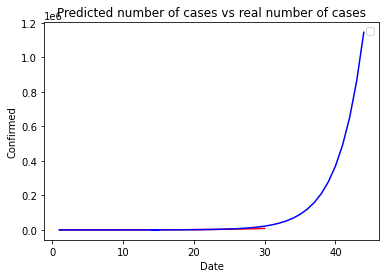

In [294]:
plt.plot(data.Time, data.Confirmed, 'red')
plt.plot(data.Time, data.Predictions, 'blue')
plt.title('Predicted number of cases vs real number of cases')
plt.xlabel('Date')
plt.ylabel('Confirmed')
plt.legend()